In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup, CategoryEncoding
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [2]:
census = pd.read_csv("census_data.csv")
census = pd.DataFrame(census)
census.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [3]:
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1

In [4]:
census['income_bracket'] = census['income_bracket'].apply(label_fix)


In [5]:
categorical_features = ['gender', 'occupation','marital_status','relationship','education','workclass','native_country']
numerical_features = ['age','education_num','capital_gain','capital_loss','hours_per_week']


In [6]:
x = census.drop('income_bracket',axis=1)
x_cat = x[categorical_features]
x_con = x[numerical_features]
y = census['income_bracket']

In [7]:
# Combine continuous and categorical variables into a DataFrame
df = pd.DataFrame(np.hstack((x_con, x_cat)), columns = ['age','education_num','capital_gain','capital_loss','hours_per_week','gender', 'occupation','marital_status','relationship','education','workclass','native_country'])
df['target'] = y

In [8]:
# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separate features and target
X_train_cont = train_df[['age','education_num','capital_gain','capital_loss','hours_per_week']].values
X_test_cont = test_df[['age','education_num','capital_gain','capital_loss','hours_per_week']].values
X_train_cat = train_df[['gender', 'occupation','marital_status','relationship','education','workclass','native_country']].values
X_test_cat = test_df[['gender', 'occupation','marital_status','relationship','education','workclass','native_country']].values
y_train = train_df['target'].values
y_test = test_df['target'].values

In [9]:
# Normalize continuous variables
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

In [10]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False)
X_train_cat = encoder.fit_transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

In [11]:
# Combine preprocessed continuous and categorical variables
X_train = np.hstack((X_train_cont, X_train_cat))
X_test = np.hstack((X_test_cont, X_test_cat))

# One-hot encode the target variable for training
#y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [12]:
# Define the classification model
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_shape = X_train.shape[1]
model = create_model(input_shape)

In [13]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

In [14]:
y_pred_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step


In [19]:
accuracy = accuracy_score(y_test, y_pred_classes)
accuracy

0.7587901120835252

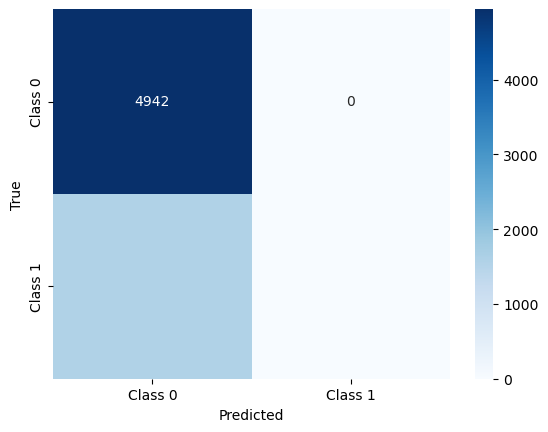

In [17]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1',], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
confusion_matrix(y_test, y_pred_classes)

array([[4942,    0],
       [1571,    0]])